In [1]:
### import modules
import numpy as np
import matplotlib.pyplot as plt
from utils import run_scenarios_size
from plot import plot_scenarios_size

# Exploring Scenarios
In order to explore regimes in which the two different vaccine failure mechanisms result in a significant difference, we quantified the impact of vaccine failure using the total recovered population. For each of the three vaccination scenarios (pre-transmission, 10 days post-transmission, 30 days post-transmission), the $R_0$ values were varied from 1.0 to 3.0, vaccine efficacy was varied from 1% effective to 100% effective, and for each $R_0$ value and vaccine efficacy, we used three different vaccination population values - below, slightly above, and above the critical vaccination level. Note that the $R_0$ values used are the values before intervention.

## Introduction
### Critical Vaccination Threshold ($f_V^*$)
The critical vaccinated threshold refers to the proportion of the population that must be vaccinated in order to reach herd immunity, preventing further transmission of the disease. This value depends on how fast the disease spreads and how effective the vaccine is, as more people would need to get vaccinated if the disease had a high $R_0$ value and low vaccine efficacy. Note that the critical vaccination level cannot exceed 1.

Recall that for this model, $R_{0,V} = R_0 (1 - \epsilon_L \epsilon_A f_V)$. From this, we can define the critical vaccination threshold as:

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0}) $$

if vaccination occurs before the epidemic begins.

If vaccination occurs after the epidemic has begun, a fraction $f_R$ has already been infected are immune to reinfection. Thus, assuming an instantaneous vaccine campaign that targets only susceptible individuals,

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0(1 - f_R)})$$

Furthermore, to investigate regimes where vaccination is insufficient, minimally sufficient, and exceedingly sufficient, we will compare vaccination compaigns that reach three different levels of vaccine coverage relative to $f^*_V$ as follows:

$$ f_{V, \text{ Below}} = 0.8f^*_V $$
$$ f_{V, \text{ Slightly above}} =  1 - 0.8(1 - f^*_V) $$
$$ f_{V, \text{ Above}} = 1 - 0.5(1 - f^*_V) $$

For $f_{V, \text{slightly above}}$ and $f_{V, \text{above}}$ values that were above 0.98 were treated as 0.98. All values were bound by 0 below and by 0.98 above. 

We then calculated the percentage reduction of the total recovered population compared to that of without vaccination by 

$$ P = \frac{R - R_V}{R} \times 100 \, (\%)$$

where $R$ is the normalized total recovered population without vaccination and $R_V$ is the normalized total recovered population with vaccination through a 'leaky' or 'all-or-nothing' vaccine.

We then found the difference in total effectiveness of the two vaccine failure modes by calculating the percentage reduction between them:

$$ \Delta TE = P_A - P_L $$

Note that the difference was always positive because the 'all-or-nothing' vaccine always performed better than the 'leaky' vaccine, and the plots below are shown after transforming $\Delta TE$ by $\log(P_A - P_L + 1)$

### Vaccination Timing

In addition to the three different vaccination coverage levels, we also varied the timing of vaccination. We assumed the vaccination campaign to be instantaneous, and we initiated vaccination when the epidemic size reached 0% (beginning of epidemic), 10% (recovered population is 10% of total population), and 25% (recovered population is 25% of total population).

### Default Parameter Values and Initial Conditions

The simulation was run with the following parameter values and initial conditions: $\gamma = 1/4$, $\sigma=1/4$, $S(0) = 0.98$, $E(0) = 0.01$, $I(0) = 0.01$, $R(0) = 0$, and the difference was measured at 30 days after vaccination, 60 days after vaccination, 150 days after vaccination, and the end of the modeled pandemic (at 200 days). The figure used in the paper is the simulation where the difference was measured at the end of the modeled pandemic.

To summarize, the following 9 scenarios were investigated with $R_0$ values varying from 1.0 to 3.0 and vaccine efficacy varying from 0.01 to 1.00 (1% to 100% effective):
- Vaccine administered at 0% epidemic size, covering $f_{V, \text{ Below}}$ of population
- Vaccine administered at 0% dpidemic size, covering $f_{V, \text{ Slightly Above}}$ of population
- Vaccine administered at 0% epidemic size, covering $f_{V, \text{ Above}}$ of population
- Vaccine administered at 10% epidemic size, covering $f_{V, \text{ Below}}$ of population
- Vaccine administered at 10% epidemic size, covering $f_{V, \text{ Slightly Above}}$ of population
- Vaccine administered at 10% epidemic size, covering $f_{V, \text{ Above}}$ of population
- Vaccine administered at 25% epidemic size, covering $f_{V, \text{ Below}}$ of population
- Vaccine administered at 25% epidemic size, covering $f_{V, \text{ Slightly Above}}$ of population
- Vaccine administered at 25% epidemic size, covering $f_{V, \text{ Above}}$ of population

## Measured 30 Days After Vaccination

/Users/dianelee/Documents/Github/vaccine-efficacy/VaccineEfficacy/utils/utils.py:847: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(np.round(np.exp(cblabels)-1).astype(int))


Stored 'epi0_m30' (DataFrame)
Stored 'epi10_m30' (DataFrame)
Stored 'epi25_m30' (DataFrame)


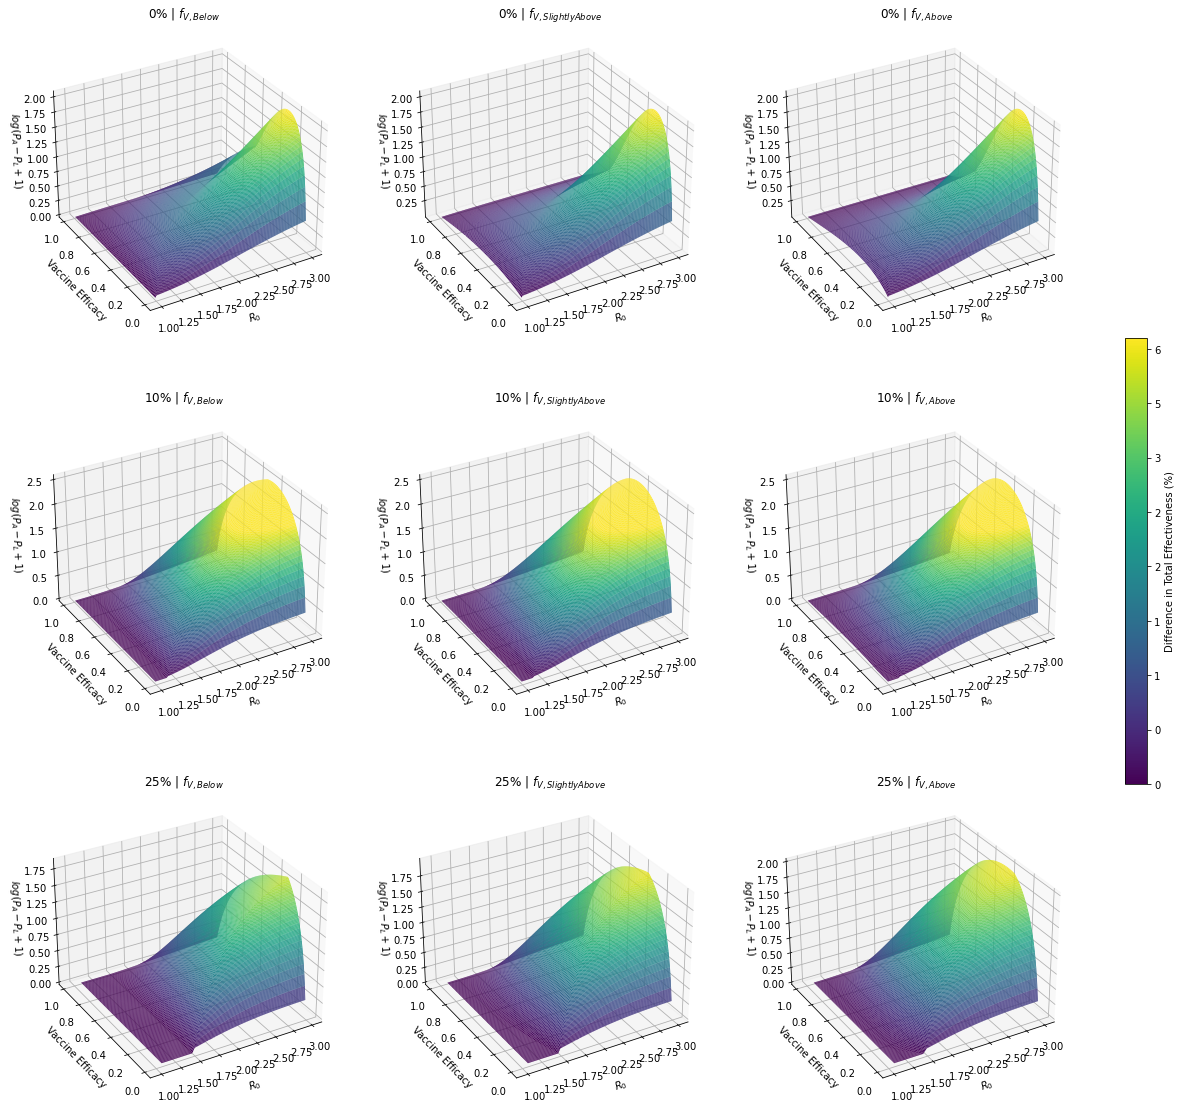

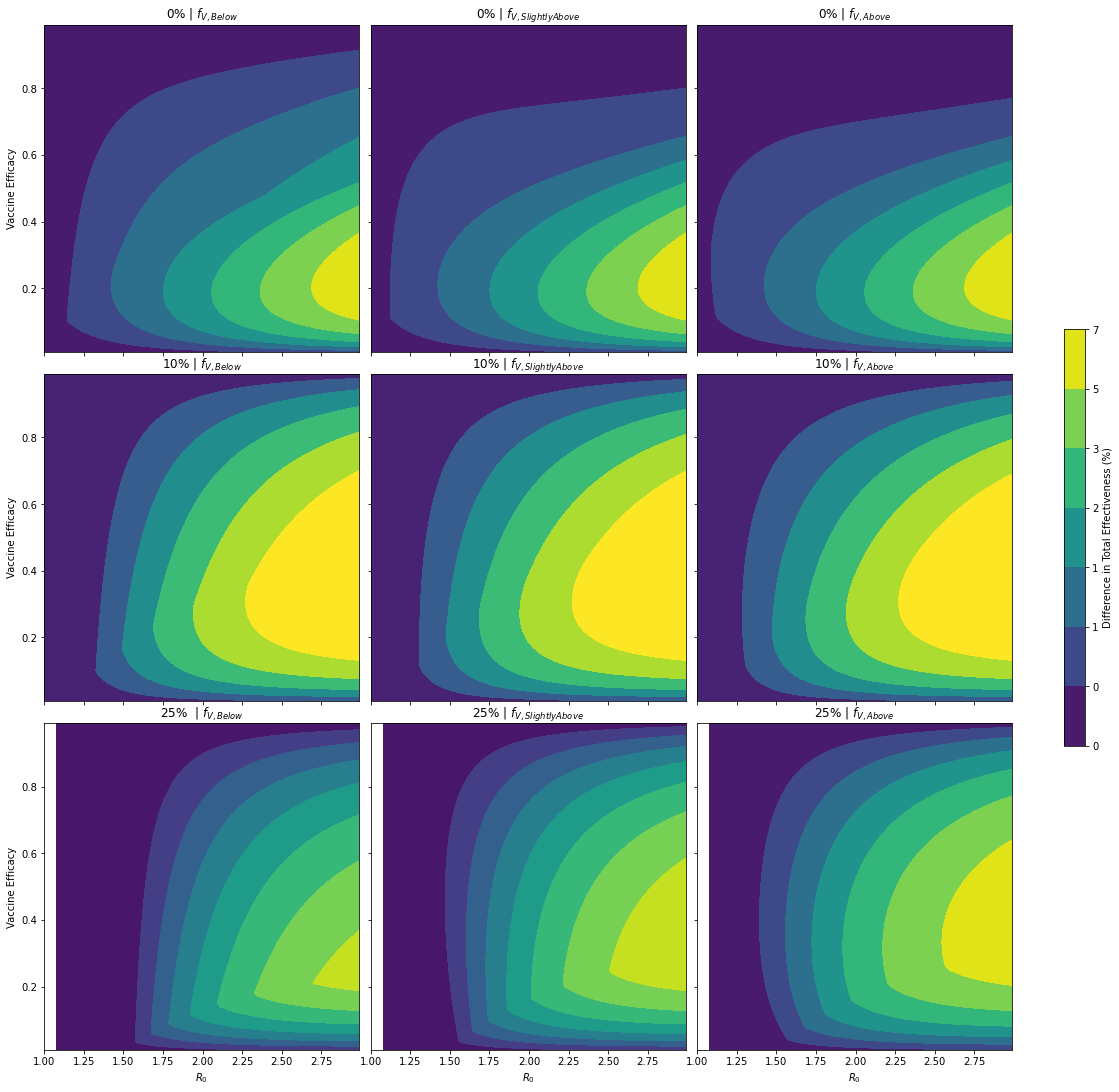

In [3]:
# define parameter values and initial conditions
sigma = 1/4; gamma = 1/4; t = 200
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = [s0, e0, i0, r0]
R0s = np.arange(1.0, 3.0, 0.01); epss = np.arange(0.01, 1.0, 0.01)

# run scenarios varying R0 values and vaccine efficacy
epi0_m30 = run_scenarios_size(y0, t, 0, R0s, sigma, gamma, epss, measured=30)
epi10_m30 = run_scenarios_size(y0, t, 0.1, R0s, sigma, gamma, epss, measured=30)
epi25_m30 = run_scenarios_size(y0, t, 0.25, R0s, sigma, gamma, epss, measured=30)

# plot difference in total effectiveness for each scenario
fig_3d = plot_scenarios_size(epi0_m30, epi10_m30, epi25_m30, dim=3)
fig_2d = plot_scenarios_size(epi0_m30, epi10_m30, epi25_m30, dim=2)

# store dataframes
%store epi0_m30
%store epi10_m30
%store epi25_m30

## Measured 60 Days After Vaccination

Stored 'epi0_m60' (DataFrame)
Stored 'epi10_m60' (DataFrame)
Stored 'epi25_m60' (DataFrame)


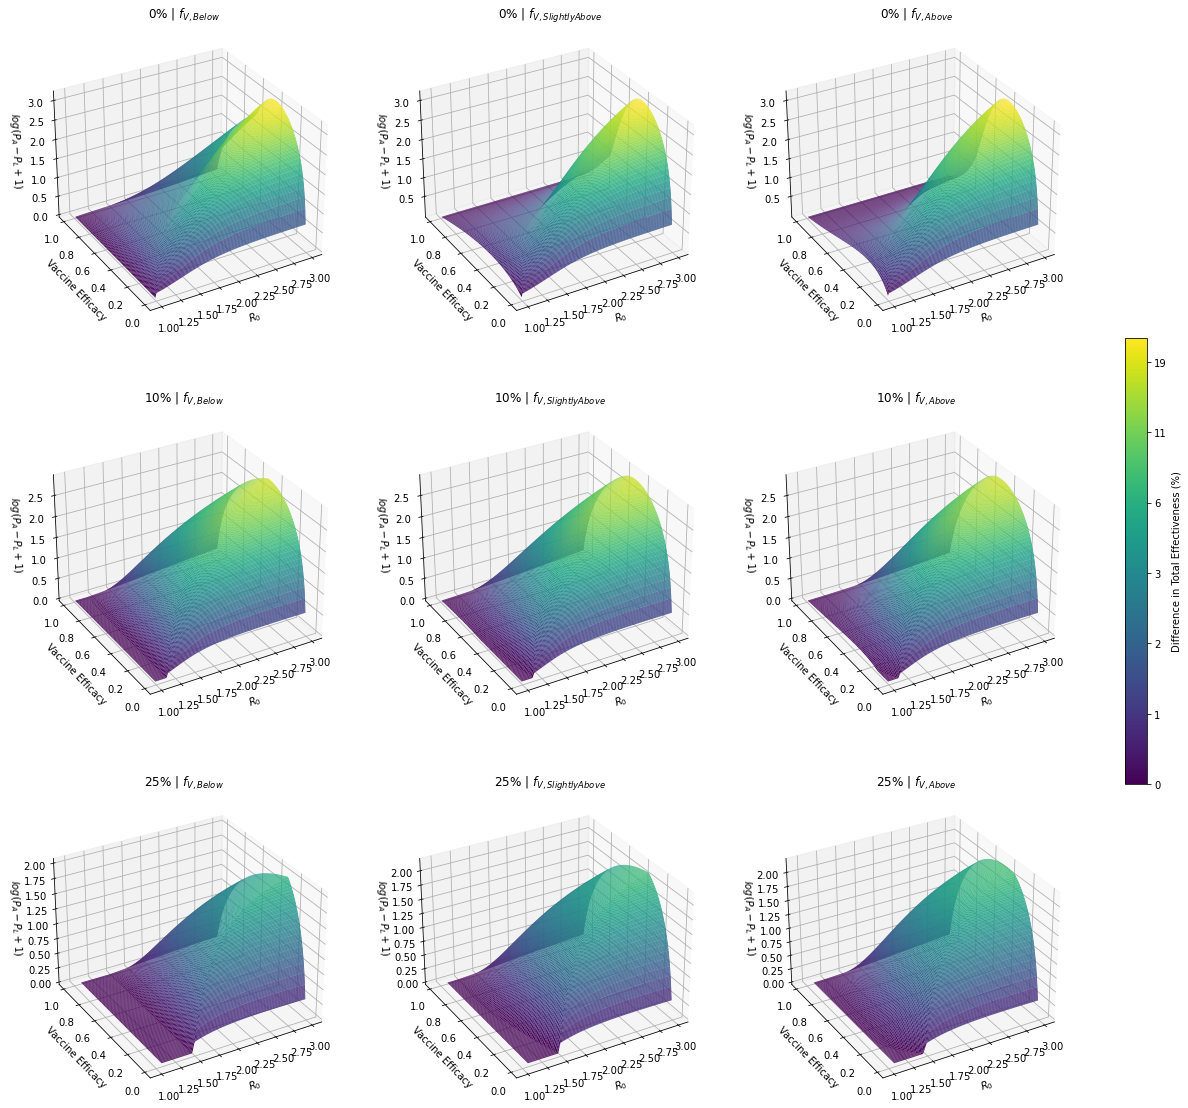

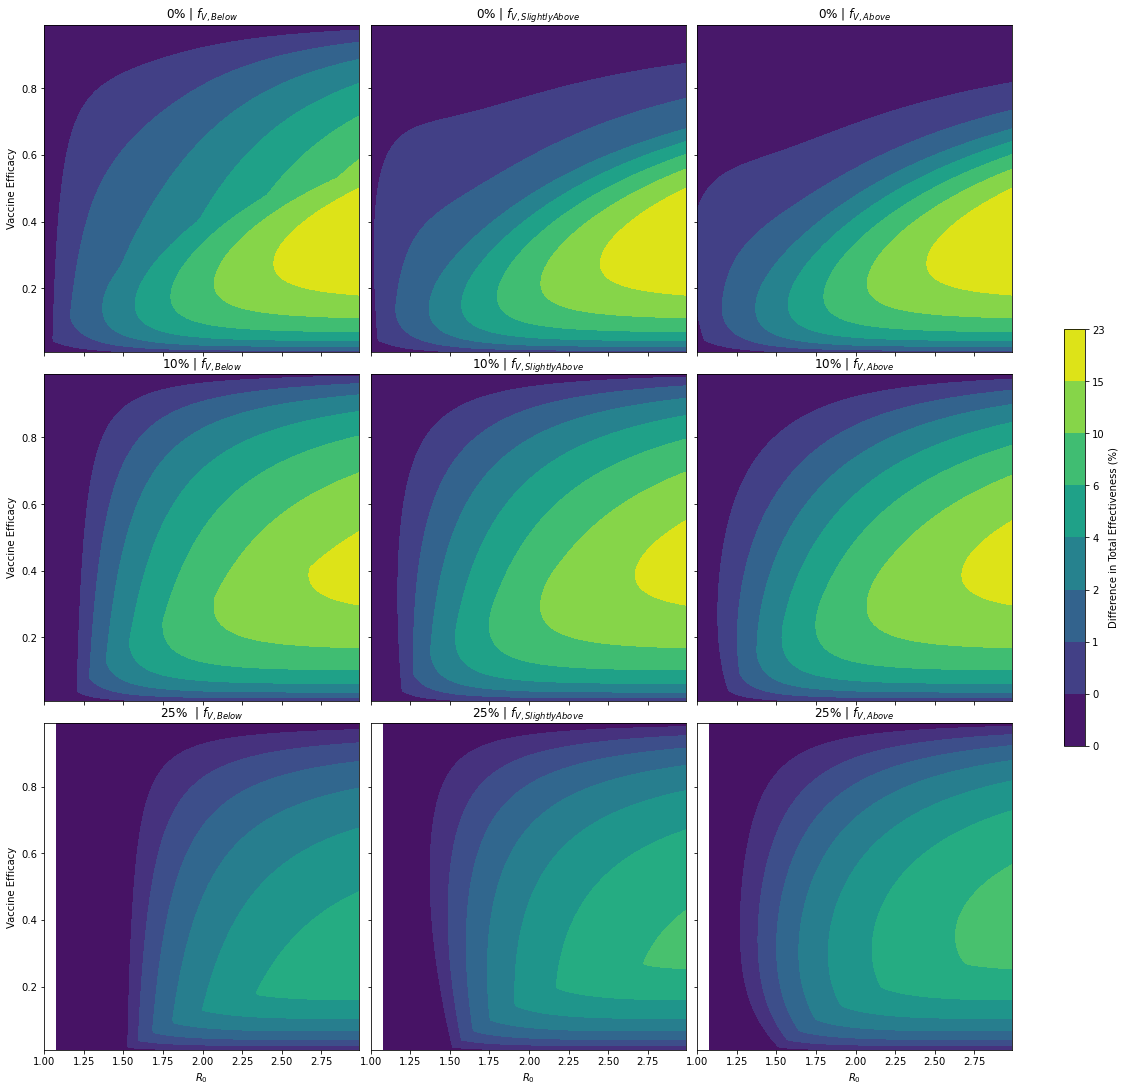

In [4]:
# define parameter values and initial conditions
sigma = 1/4; gamma = 1/4; t = 200
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = [s0, e0, i0, r0]
R0s = np.arange(1.0, 3.0, 0.01); epss = np.arange(0.01, 1.0, 0.01)

# run scenarios varying R0 values and vaccine efficacy
epi0_m60 = run_scenarios_size(y0, t, 0, R0s, sigma, gamma, epss, measured=60)
epi10_m60 = run_scenarios_size(y0, t, 0.1, R0s, sigma, gamma, epss, measured=60)
epi25_m60 = run_scenarios_size(y0, t, 0.25, R0s, sigma, gamma, epss, measured=60)

# plot difference in total effectiveness for each scenario
fig_3d = plot_scenarios_size(epi0_m60, epi10_m60, epi25_m60, dim=3)
fig_2d = plot_scenarios_size(epi0_m60, epi10_m60, epi25_m60, dim=2)

# store dataframes
%store epi0_m60
%store epi10_m60
%store epi25_m60

## Measured 100 Days After Vaccination

/Users/dianelee/Documents/Github/vaccine-efficacy/VaccineEfficacy/utils/utils.py:847: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(np.round(np.exp(cblabels)-1).astype(int))


Stored 'epi0_m100' (DataFrame)
Stored 'epi10_m100' (DataFrame)
Stored 'epi25_m100' (DataFrame)


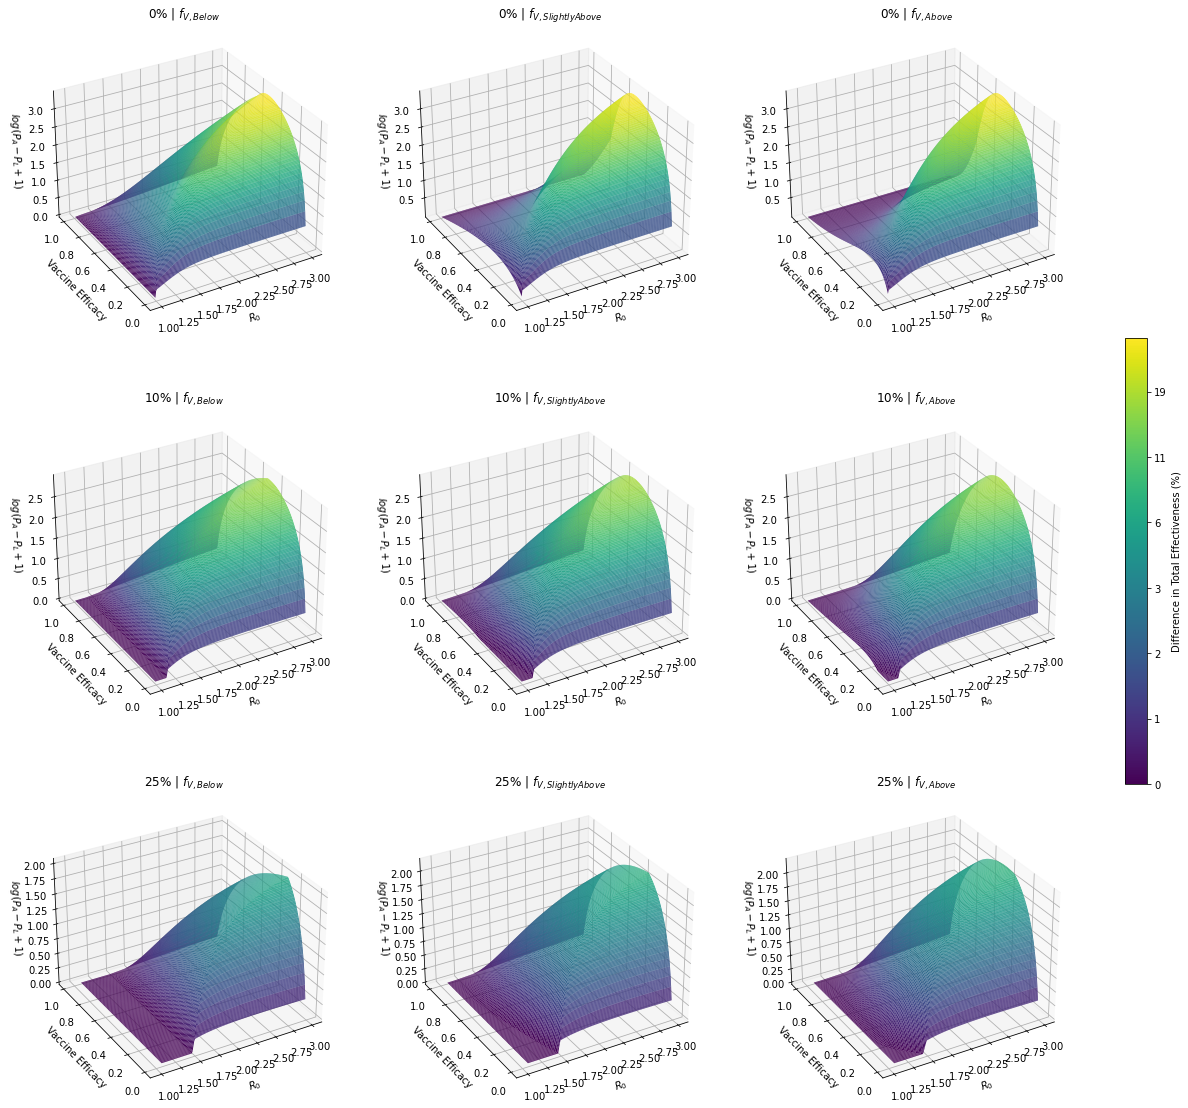

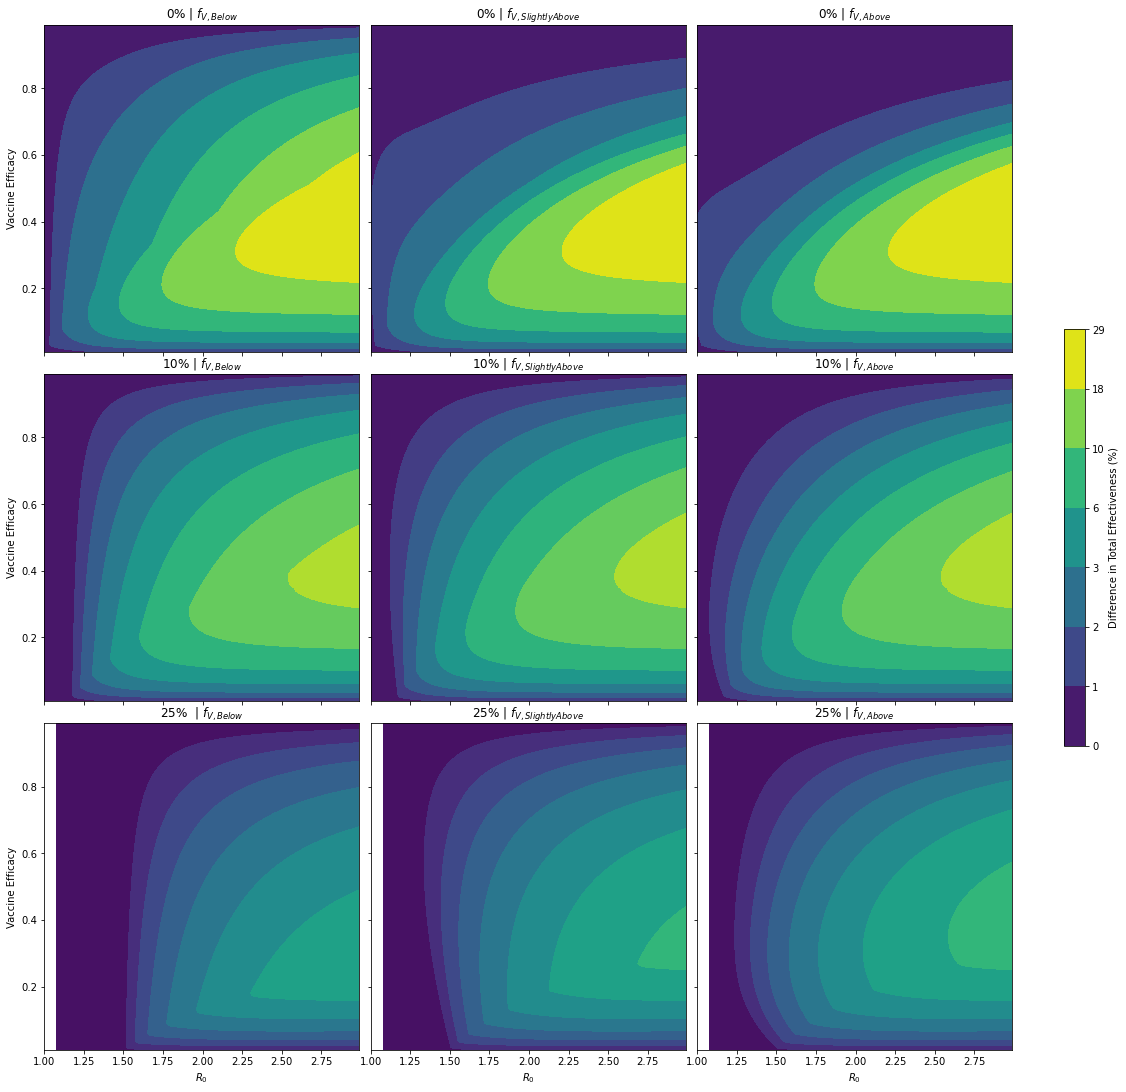

In [5]:
# define parameter values and initial conditions
sigma = 1/4; gamma = 1/4; t = 200
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = [s0, e0, i0, r0]
R0s = np.arange(1.0, 3.0, 0.01); epss = np.arange(0.01, 1.0, 0.01)

# run scenarios varying R0 values and vaccine efficacy
epi0_m100 = run_scenarios_size(y0, t, 0, R0s, sigma, gamma, epss, measured=100)
epi10_m100 = run_scenarios_size(y0, t, 0.1, R0s, sigma, gamma, epss, measured=100)
epi25_m100 = run_scenarios_size(y0, t, 0.25, R0s, sigma, gamma, epss, measured=100)

# plot difference in total effectiveness for each scenario
fig_3d = plot_scenarios_size(epi0_m100, epi10_m100, epi25_m100, dim=3)
fig_2d = plot_scenarios_size(epi0_m100, epi10_m100, epi25_m100, dim=2)

# store dataframes
%store epi0_m100
%store epi10_m100
%store epi25_m100

## Measured 200 Days After Vaccination (End of Epidemic)

/Users/dianelee/Documents/Github/vaccine-efficacy/VaccineEfficacy/utils/utils.py:847: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(np.round(np.exp(cblabels)-1).astype(int))


Stored 'epi0_m200' (DataFrame)
Stored 'epi10_m200' (DataFrame)
Stored 'epi25_m200' (DataFrame)


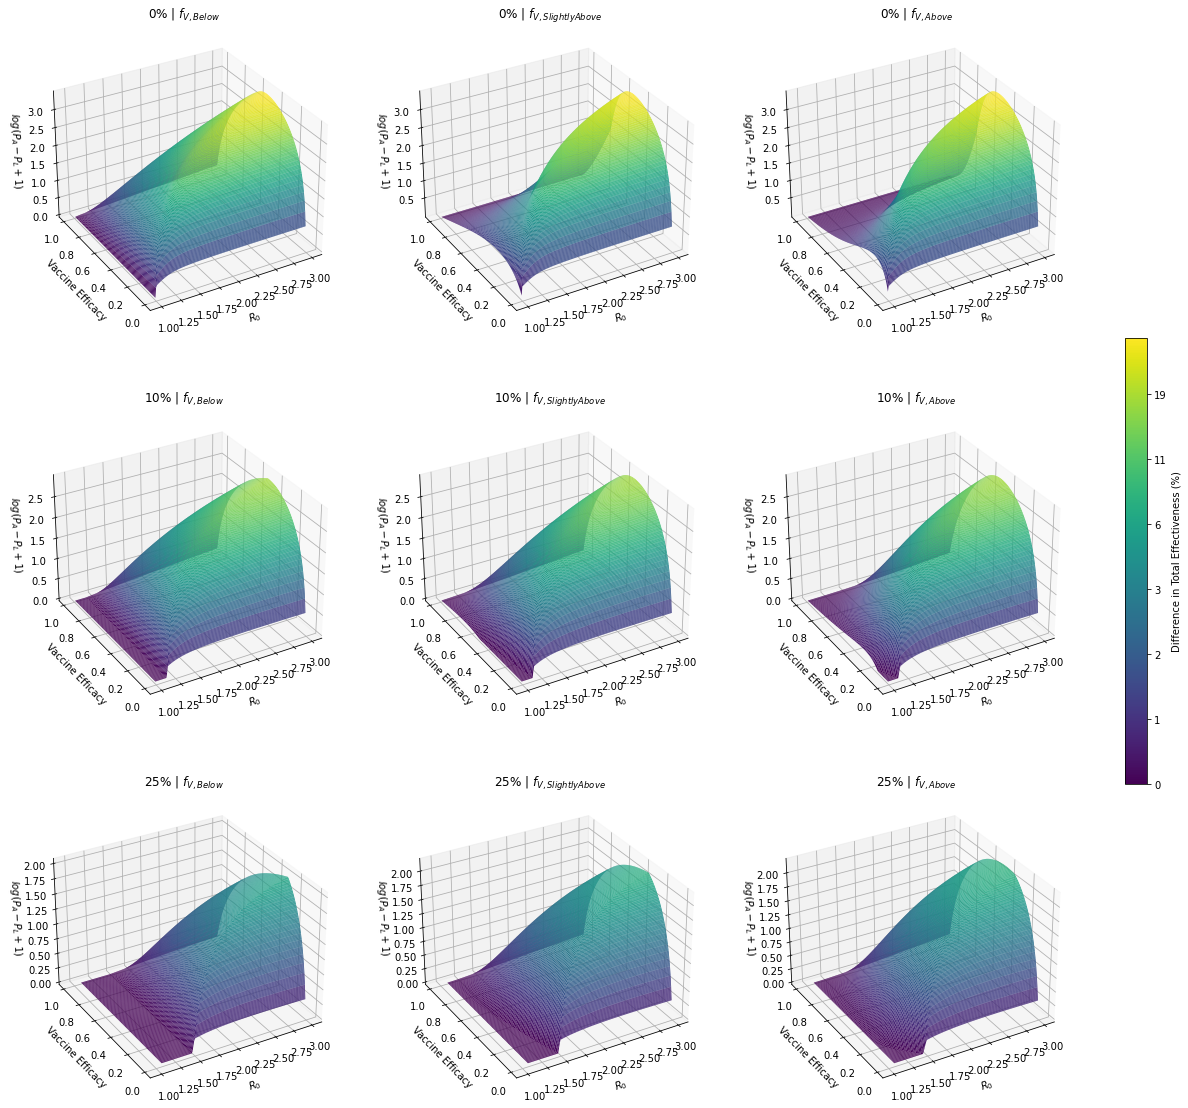

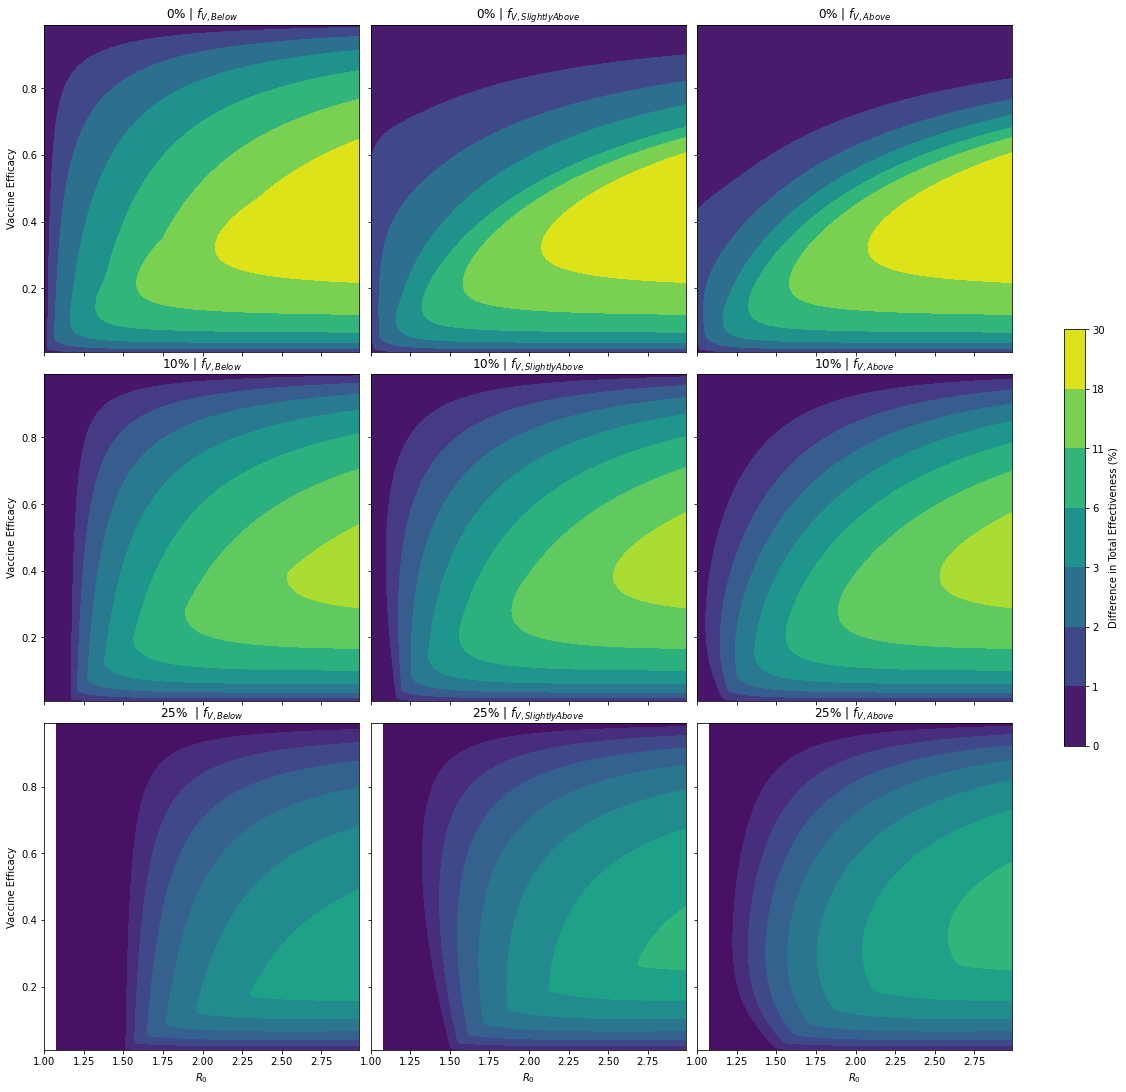

In [2]:
# define parameter values and initial conditions
sigma = 1/4; gamma = 1/4; t = 200
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = [s0, e0, i0, r0]
R0s = np.arange(1.0, 3.0, 0.01); epss = np.arange(0.01, 1.0, 0.01)

# run scenarios varying R0 values and vaccine efficacy
epi0_m200 = run_scenarios_size(y0, t, 0, R0s, sigma, gamma, epss, measured=200)
epi10_m200 = run_scenarios_size(y0, t, 0.1, R0s, sigma, gamma, epss, measured=200)
epi25_m200 = run_scenarios_size(y0, t, 0.25, R0s, sigma, gamma, epss, measured=200)

# plot difference in total effectiveness for each scenario and save figures
fig_3d = plot_scenarios_size(epi0_m200, epi10_m200, epi25_m200, dim=3)
plt.savefig('scenarios_3d_m200.jpg', bbox_inches='tight')
fig_2d = plot_scenarios_size(epi0_m200, epi10_m200, epi25_m200, dim=2)
plt.savefig('scenarios_2d_m200.jpg', bbox_inches='tight')

# store dataframes
%store epi0_m200
%store epi10_m200
%store epi25_m200